## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [2]:
def solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx):
    for n in range(nt):
        for i in range(nx):
          un[i] = u[i]
        for i in range(1,nx): 
          u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i - 1])

    return 0

## Numba accelerator

In [3]:
@njit(fastmath=True)
def solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx):
    for n in range(nt):
        for i in range(nx):
          un[i] = u[i]
        for i in range(1,nx): 
          u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i - 1])
    
    return 0

## Pyccel accelerator

In [4]:
@types('float[:]','float[:]', 'int', 'int','float', 'float')
def solve_1d_nonlinearconv_pyccel(u, un, nt, nx, dt, dx):
    for n in range(nt):
        for i in range(nx):
          un[i] = u[i]
        for i in range(1,nx): 
          u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i - 1])
    
    return 0

## Inputs

Text(0.5, 1.0, '1D Linear Convection')

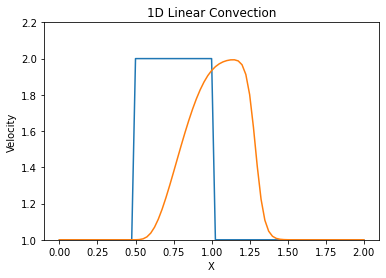

In [5]:
nx = 81  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 200    #nt is the number of timesteps we want to calculate
dt = 0.001
grid = np.linspace(0,2,nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
un = np.ones(nx)

solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')

## Call Funtions

### Pure function

In [6]:
%timeit solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)

175 ms ± 19.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [7]:
%timeit solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx)

22.6 µs ± 3.88 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [8]:
solve_1d_nonlinearconv_f90 = epyccel(solve_1d_nonlinearconv_pyccel)


ERROR at Fortran compilation stage


CalledProcessError: Command 'gfortran  -O3 -fPIC  -I"C:\Users\hp\Desktop\Distributed-Computing-HPC-Assignments-main\notebooks\Numba_Pyccel\__epyccel__\__pyccel__" -c   "C:\Users\hp\Desktop\Distributed-Computing-HPC-Assignments-main\notebooks\Numba_Pyccel\__epyccel__\__pyccel__\mod_qskh2zwv.f90" -o "C:\Users\hp\Desktop\Distributed-Computing-HPC-Assignments-main\notebooks\Numba_Pyccel\__epyccel__\__pyccel__\mod_qskh2zwv.o"  -J"C:\Users\hp\Desktop\Distributed-Computing-HPC-Assignments-main\notebooks\Numba_Pyccel\__epyccel__\__pyccel__"' returned non-zero exit status 1.

In [ ]:
%timeit solve_1d_nonlinearconv_f90(u, un, nt, nx, dt, dx)